$\alpha$

$x^2$

$f(x)$

$\beta$

$\sigma$

# 수학으로 풀기

In [2]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

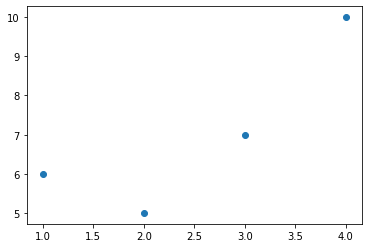

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

In [4]:
yhat=x*1.4+3.5
print(yhat)

[4.9 6.3 7.7 9.1]


In [5]:
yhat-y

array([-1.1,  1.3,  0.7, -0.9])

In [6]:
np.power(yhat-y,2)

array([1.21, 1.69, 0.49, 0.81])

In [7]:
np.sum(np.power(yhat-y,2))

4.199999999999998

# 파이썬으로 풀기

In [9]:
# differentiation
import sympy as sp
b0,b1=sp.symbols('b0 b1')

In [13]:
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0) #f 함수 b0에 대하여 편미분
fdiff_b1=sp.diff(f,b1) #f 함수 b1에 대하여 편미분
print("fdiff with b0: ",fdiff_b0,"\n","fdiff with b1: ",fdiff_b1)

fdiff with b0:  8*b0 + 20*b1 - 56 
 fdiff with b1:  20*b0 + 60*b1 - 154


In [14]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1]) #식 두개와 구하려는 두개의 값
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


# R2

In [15]:
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

In [16]:
A=np.array([x,np.ones(9)])
print (A)

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [18]:
w0,w1=np.linalg.lstsq(A.T,y)[0]
print(w0,w1)

0.7166666666666672 19.188888888888897


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [20]:
yhat=w0*x+w1
print (yhat)

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


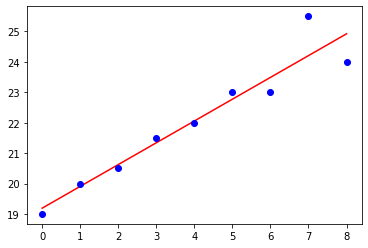

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

In [22]:
SSR = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/TSS
print (r_squared) #실제값의 91% 정도 설명할수 있다

0.9138385502471171


In [24]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1
print (adjusted_r_squared)

0.8851180669961561


In [32]:
#import statsmodels.formula.api as sm
import statsmodels.api as sm

result = sm.OLS(y,A.T).fit()
print (result.summary())
print (result.rsquared, result.rsquared_adj)
# 0.877643371323 0.863248473832

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           5.66e-05
Time:                        16:51:47   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.0

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


# matrix inverse method (w 웨이트 구하는 방법)

입력변수 x1, x2로부터 출력변수 y가 있다고 하자. 2x1−4x2=8
3x1+6x2=9

In [33]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]

In [34]:
print ("x: ", x, "y: ", y)

x:  [[2, -4], [3, 6]] y:  [8, 9]


In [39]:
np.set_printoptions(precision=2, suppress=True)

In [40]:
xI = np.linalg.inv(x) 
print ("x inv: \n", xI)

x inv: 
 [[ 0.25  0.17]
 [-0.12  0.08]]


In [42]:
print ("identity matrix 'x * xT': \n", np.dot(x,xI))

identity matrix 'x * xT': 
 [[1. 0.]
 [0. 1.]]


In [45]:
print (np.eye(2))

[[1. 0.]
 [0. 1.]]


## 데이터

In [46]:
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [47]:
x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [48]:
print (x.shape,x.T.shape)

(4, 2) (2, 4)


In [49]:
np.dot(x,x.T)

array([[ 2.,  3.,  4.,  5.],
       [ 3.,  5.,  7.,  9.],
       [ 4.,  7., 10., 13.],
       [ 5.,  9., 13., 17.]])

In [52]:
xTx=np.dot(x.T,x)
print("xTx=\n",xTx)

xTx=
 [[30. 10.]
 [10.  4.]]


In [53]:
xTxI=np.linalg.inv(xTx)
print("xTxI=\n",xTxI)

xTxI=
 [[ 0.2 -0.5]
 [-0.5  1.5]]


In [54]:
xTy=np.dot(x.T,y)
print("xTyT=",xTy)

xTyT= [77. 28.]


In [56]:
print("weights=",np.dot(xTxI,xTy))

weights= [1.4 3.5]


In [57]:
np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y)) #y절 w0, 기울기 w1

array([1.4, 3.5])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


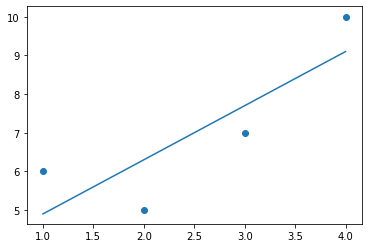

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)